### Reading and Understanding the Dataset

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load dataset
df_main = pd.read_csv('/content/drive/MyDrive/CAR DETAILS FROM CAR DEKHO.csv')
df_main1 = pd.read_csv('/content/drive/MyDrive/car data.csv')

In [ ]:
df_main.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df_main1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df_main.shape

(4340, 8)

In [ ]:
df_main1.shape

(301, 9)

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df_main1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#numerical stats
df_main.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df_main1.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
#missing values
df_main.isna().sum()

df_main1.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print(df_main.columns)
print(df_main1.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')
Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


### Data Preprocessing

In [ ]:
df_main1.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

In [ ]:
df_main.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
df_main1.columns

Index(['Car_Name', 'Year', 'Selling_Price(lacs)', 'Present_Price(lacs)',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission',
       'Past_Owners'],
      dtype='object')

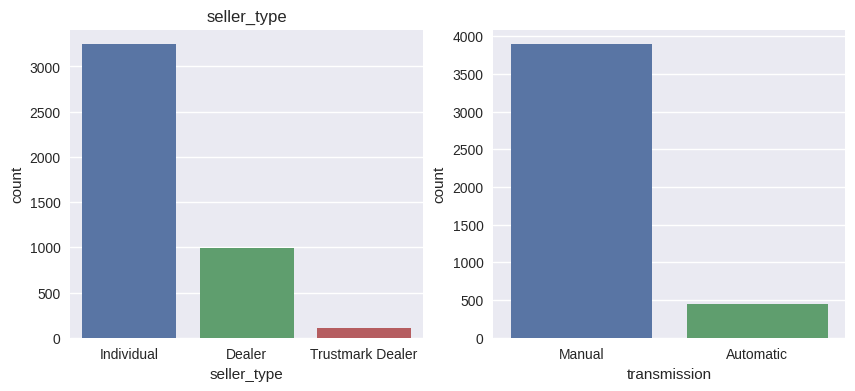

In [ ]:
cat_cols = ['seller_type','transmission','owner']
i=0
while i < 2:
    fig = plt.figure(figsize=[10,4])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1

    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1

    plt.show()

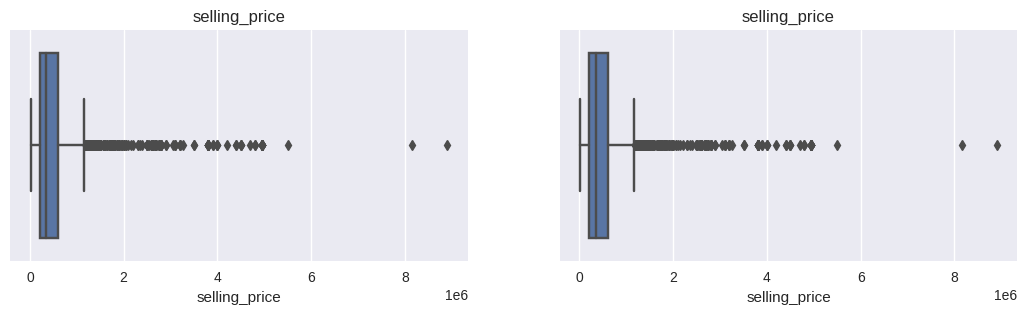

In [ ]:
num_cols = ['selling_price','selling_price','km_driven','Age']
i=0
while i < 2:
    fig = plt.figure(figsize=[13,3])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1

    ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1

    plt.show()

In [ ]:
df_main[df_main['selling_price'] > df_main['selling_price'].quantile(0.99)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
101,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,4500000,9800,Petrol,Dealer,Automatic,First Owner
539,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,2014,4400000,100000,Diesel,Individual,Automatic,Second Owner
553,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner
555,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
572,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner
574,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
591,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner
593,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
610,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner


In [ ]:
df_main[df_main['selling_price'] > df_main['selling_price'].quantile(0.99)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
101,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,4500000,9800,Petrol,Dealer,Automatic,First Owner
539,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,2014,4400000,100000,Diesel,Individual,Automatic,Second Owner
553,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner
555,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
572,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner
574,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
591,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner
593,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
610,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner


In [ ]:
df_main[df_main['km_driven'] > df_main['km_driven'].quantile(0.99)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
69,Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,2010,280000,350000,Diesel,Individual,Manual,Second Owner
70,Toyota Corolla Altis Diesel D4DG,2011,350000,230000,Diesel,Individual,Manual,First Owner
197,Mahindra Xylo E4,2009,229999,230000,Diesel,Individual,Manual,Third Owner
525,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner
1101,Tata Indica DLS,2006,85000,300000,Diesel,Individual,Manual,Second Owner
1116,Toyota Innova 2.5 V Diesel 7-seater,2005,200000,223000,Diesel,Individual,Manual,First Owner
1243,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner
1253,Toyota Corolla Altis D-4D J,2014,715000,234000,Diesel,Individual,Manual,First Owner
1414,Skoda Superb Elegance 2.0 TDI CR AT,2011,450000,235000,Diesel,Individual,Automatic,First Owner
1426,Mahindra Scorpio VLX AT 2WD BSIII,2004,225000,223660,Diesel,Individual,Automatic,Third Owner


#### Bivariate/Multi-Variate Analysis

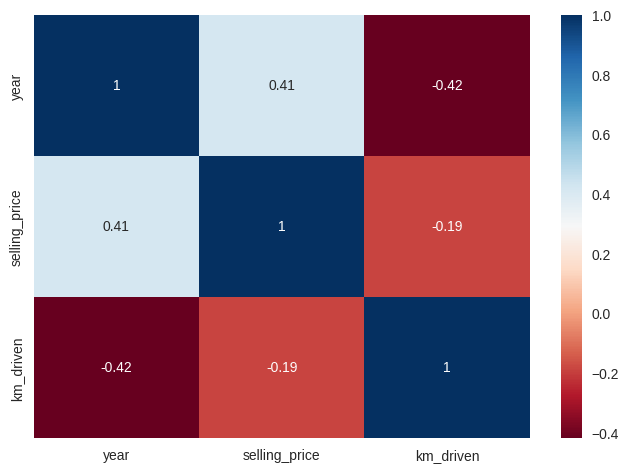

In [ ]:
sns.heatmap(df_main.corr(), annot=True, cmap="RdBu")
plt.show()

In [ ]:
df_main.corr()['selling_price']

year             0.413922
selling_price    1.000000
km_driven       -0.192289
Name: selling_price, dtype: float64

In [ ]:
df_main.pivot_table(values='selling_price', index = 'seller_type', columns= 'fuel')

fuel,CNG,Diesel,Electric,LPG,Petrol
seller_type,,,,,
Dealer,311444.333333,9.423081e+05,310000.0,240000.000000,475017.552863
Individual,267225.741935,5.616871e+05,NaN,164545.409091,297196.682972
Trustmark Dealer,NaN,1.184583e+06,NaN,NaN,675277.777778


In [ ]:
df_main.pivot_table(values='selling_price', index = 'seller_type', columns= 'transmission')

transmission,Automatic,Manual
seller_type,,
Dealer,1.571880e+06,484419.508366
Individual,1.191722e+06,370861.010224
Trustmark Dealer,1.953158e+06,677289.156627


### Data Preparation

#### Creating Dummies for Categorical Features

In [ ]:
df_main.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df_main = pd.get_dummies(data = df_main,drop_first=True)

In [ ]:
df_main.head()

,year,selling_price,km_driven,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A4 3.0 TDI Quattro,name_Audi A4 30 TFSI Technology,name_Audi A4 35 TDI Premium,name_Audi A4 35 TDI Premium Plus,name_Audi A4 New 2.0 TDI Multitronic,name_Audi A5 Sportback,name_Audi A6 2.0 TDI Design Edition,name_Audi A6 2.0 TDI Premium Plus,name_Audi A6 2.7 TDI,name_Audi A6 2.8 FSI,name_Audi A8 4.2 TDI,name_Audi A8 L 3.0 TDI quattro,name_Audi Q3 2.0 TDI Quattro Premium Plus,name_Audi Q3 35 TDI Quattro Technology,name_Audi Q5 2.0 TDI,name_Audi Q5 2.0 TFSI Quattro,name_Audi Q5 2.0 TFSI Quattro Premium Plus,name_Audi Q5 3.0 TDI Quattro Technology,name_Audi Q7 35 TDI Quattro Premium,name_Audi RS7 2015-2019 Sportback Performance,name_BMW 3 Series 320d Luxury Line,name_BMW 3 Series 320d Sport,name_BMW 3 Series 320d Sport Line,name_BMW 3 Series GT Luxury Line,name_BMW 5 Series 520d Luxury Line,name_BMW 5 Series 525d Sedan,name_BMW 5 Series 530i,name_BMW 7 Series 730Ld,name_BMW 7 Series Signature 730Ld,name_BMW X1 sDrive 20d Exclusive,name_BMW X1 sDrive 20d xLine,name_BMW X1 sDrive20d,name_BMW X1 sDrive20d M Sport,name_BMW X5 xDrive 30d xLine,name_Chevrolet Aveo 1.4,name_Chevrolet Aveo 1.4 CNG,name_Chevrolet Aveo 1.4 LS,name_Chevrolet Aveo 1.4 LT BSIV,name_Chevrolet Aveo 1.6 LT,name_Chevrolet Aveo 1.6 LT with ABS,name_Chevrolet Aveo U-VA 1.2,name_Chevrolet Aveo U-VA 1.2 LS,name_Chevrolet Aveo U-VA 1.2 LT,name_Chevrolet Aveo U-VA 1.2 LT WO ABS Airbag,name_Chevrolet Beat Diesel,name_Chevrolet Beat Diesel LS,name_Chevrolet Beat Diesel LT,name_Chevrolet Beat Diesel LT Option,name_Chevrolet Beat Diesel PS,name_Chevrolet Beat LS,name_Chevrolet Beat LT,name_Chevrolet Beat LT LPG,name_Chevrolet Beat LT Option,name_Chevrolet Beat PS,name_Chevrolet Captiva 2.0L VCDi,name_Chevrolet Captiva LT,name_Chevrolet Cruze LT,name_Chevrolet Cruze LTZ,name_Chevrolet Cruze LTZ AT,name_Chevrolet Enjoy 1.3 TCDi LS 8,name_Chevrolet Enjoy TCDi LS 8 Seater,name_Chevrolet Enjoy TCDi LT 7 Seater,name_Chevrolet Enjoy TCDi LT 8 Seater,name_Chevrolet Enjoy TCDi LTZ 7 Seater,name_Chevrolet Optra 1.6,name_Chevrolet Optra 1.6 LS,name_Chevrolet Optra Magnum 2.0 LS,name_Chevrolet Optra Magnum 2.0 LS BSIII,name_Chevrolet Optra Magnum 2.0 LT,name_Chevrolet Sail 1.2 Base,name_Chevrolet Sail 1.2 LT ABS,name_Chevrolet Sail 1.3 LS,name_Chevrolet Sail Hatchback 1.2 LS,name_Chevrolet Sail Hatchback 1.3 TCDi,name_Chevrolet Sail Hatchback 1.3 TCDi LT ABS,name_Chevrolet Sail Hatchback LS ABS,name_Chevrolet Sail Hatchback LT ABS,name_Chevrolet Sail LS ABS,name_Chevrolet Spark 1.0,name_Chevrolet Spark 1.0 LS,name_Chevrolet Spark 1.0 LT,name_Chevrolet Spark 1.0 LT BS3,name_Chevrolet Spark 1.0 LT Option Pack w/ Airbag,name_Chevrolet Spark 1.0 PS,name_Chevrolet Tavera LS B3 7 Seats BSII,name_Chevrolet Tavera LT L1 7 Seats BSIII,name_Chevrolet Tavera Neo 2 LS B4 7 Str BSIII,name_Chevrolet Tavera Neo 2 LT L 9 Str,name_Chevrolet Tavera Neo 3 10 Seats BSIV,name_Chevrolet Tavera Neo 3 9 Str BSIII,name_Chevrolet Tavera Neo 3 LS 7 C BSIII,name_Chevrolet Tavera Neo 3 LT 9 Seats BSIII,name_Chevrolet Tavera Neo 3 Max 9 Str BSIII,name_Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,name_Daewoo Matiz SD,name_Datsun GO A,name_Datsun GO Plus A,name_Datsun GO Plus A Option Petrol,name_Datsun GO Plus Remix Limited Edition,name_Datsun GO Plus T,name_Datsun GO Plus T BSIV,name_Datsun GO Plus T Option,name_Datsun GO Plus T Option BSIV,name_Datsun GO Plus T Option Petrol,name_Datsun GO T BSIV,name_Datsun GO T Option BSIV,name_Datsun GO T Petrol,name_Datsun RediGO 1.0 S,name_Datsun RediGO 1.0 T Option,name_Datsun RediGO AMT 1.0 S,name_Datsun RediGO S,name_Datsun RediGO SV 1.0,name_Datsun RediGO T Option,name_Datsun redi-GO AMT 1.0 T Option,name_Fiat 500 Lounge,name_Fiat Avventura MULTIJET Emotion,name_Fiat Avventura Urban Cross 1.3 Multijet Emotion,name_Fiat Grande Punto 1.3 Dynamic (Diesel),name_Fiat Grande Punt

### Train-Test Split

In [ ]:
# Separating target variable and its features
y = df_main['selling_price']
X = df_main.drop('selling_price',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (3472, 1503)
x test:  (868, 1503)
y train:  (3472,)
y test:  (868,)


### Model Creation/Evaluation

#### Applying regression models
1. Linear Regression
2. Ridge Regression

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)

    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))

    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))

    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))

    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))

    # Plotting Graphs
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')

    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')

    plt.show()

#### Standard Linear Regression or Ordinary Least Squares

Train R2-score : 0.98
Test R2-score : -571503132206.21
Train CV scores : [-2.70937974e+11  8.27719992e-01 -9.57338865e+11  8.00624090e-01
  7.96070305e-01]
Train CV mean : -245655367814.52


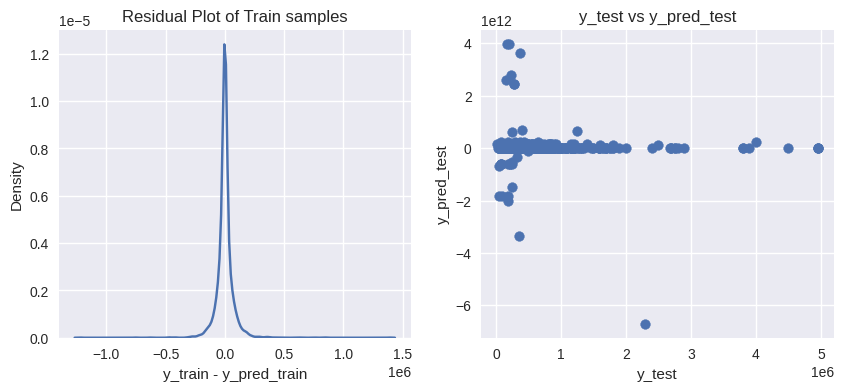

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

#### Ridge

Train R2-score : 0.98
Test R2-score : 0.87
Train CV scores : [0.66845935 0.83891879 0.55756951 0.81401987 0.8188617 ]
Train CV mean : 0.74


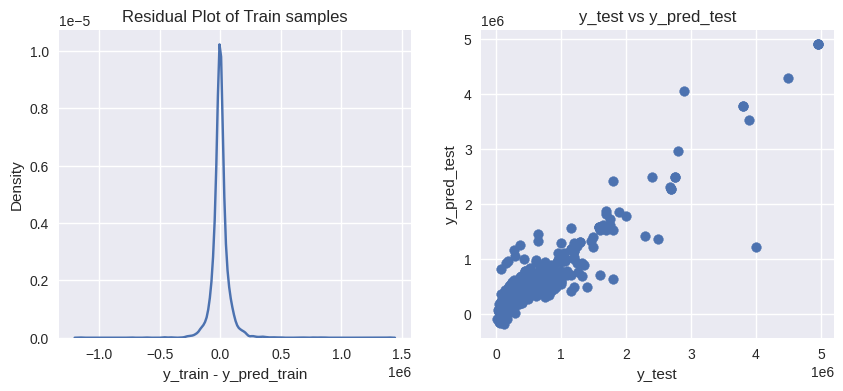

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")